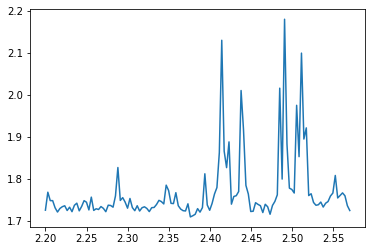

In [8]:
import math
import matplotlib.pyplot as plt
import numpy
import random

comparisons = 0

def reset_comparisons():
    global comparisons
    comparisons = 0

def shellsort(mutable_unsorted, gap_sequence):
    global comparisons
    for gap_index in reversed(range(len(gap_sequence) - 1)):
        gap = gap_sequence[gap_index]
        if (gap > len(mutable_unsorted)):
            continue
        for index, value in enumerate(mutable_unsorted[gap:], gap):
            while index >= gap and mutable_unsorted[index - gap] > value:
                comparisons += 1
                mutable_unsorted[index] = mutable_unsorted[index - gap]
                index -= gap
            comparisons += 1
            mutable_unsorted[index] = value

def gap_sequence_generator(multiplier, array_size):
    result = [1]
    index = 0
    last = 1
    while last < array_size:
        index += 1
        last = math.ceil(multiplier**index)
        result.append(last)
    return result

def gap_sequence_generator_accumulated(multiplier, array_size):
    result = [1]
    index = 0
    last = 1
    while last < array_size:
        index += 1
        last = math.ceil((-1 + multiplier**(1 + index))/(-1 + multiplier))
        result.append(last)
    return result

min_multiplier = 2.2 # 1.2
max_multiplier = 2.57 # 6
multiplier_sampling_rate = 127 # 1000
multiplier_interval = (max_multiplier - min_multiplier)/(multiplier_sampling_rate-1)
number_of_tests = 13 # 40
min_array_size = 10000 # 1000000
max_array_size = 60000 # 6000000

test_cases = []
offsets = []
for test in range(number_of_tests):
    test_cases.append(numpy.random.rand(max_array_size))
    offsets.append(random.uniform(-multiplier_interval/2,+multiplier_interval/2))

x_data = []
y_data = []
for multiplier in numpy.linspace(min_multiplier, max_multiplier, multiplier_sampling_rate):
    y_sum = 0
    for test_case in range(number_of_tests):
        reset_comparisons()
        mutable_unsorted = numpy.copy(test_cases[test_case])
        optimal_comparisons = math.log(math.factorial(len(mutable_unsorted)), 2)
        shellsort(mutable_unsorted, gap_sequence_generator_accumulated(multiplier + offsets[test_case], max_array_size))   
        comparison_effectiveness = comparisons/optimal_comparisons
        y_sum += comparison_effectiveness
    x_data.append(multiplier)
    y_data.append(y_sum/number_of_tests)
    #print(optimal_comparisons, comparisons, len(mutable_unsorted),)

plt.plot(x_data, y_data)
plt.show()